# Handwriting Recognition (digits from 0 to 9) using sklearn libraries

#### Importing libraries and Datasets from sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


In [4]:
digits=load_digits()

#### Analyze a sample image

<Figure size 432x288 with 0 Axes>

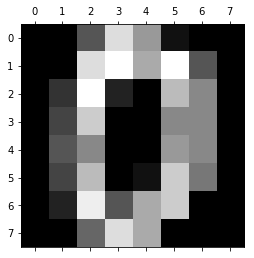

In [7]:
import pylab as pl
pl.gray()
pl.matshow(digits.images[0])
pl.show()

#### Analyze image pixels

In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
digits.target[0]

0

#### Visualize first 15 images

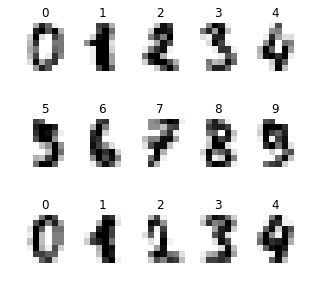

In [25]:
images_and_labels=list(zip(digits.images,digits.target))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % label)

#### Model the data using sklearn ensemble

In [27]:
#importing libraries
import random
from sklearn import ensemble

In [29]:
#Define variables
n_samples=len(digits.images)
print(n_samples)

1797


In [115]:
x=digits.images.reshape((n_samples,-1))
print(x.shape)

(1797, 64)


In [35]:
y=digits.target
print(y.shape)

(1797,)


In [55]:
#create random indices
sample_index=random.sample(range(len(x)),int(len(x)/5))
valid_index=[i for i in range(len(x)) if i not in sample_index]

In [59]:
#sample and validation images
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

In [60]:
#sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

In [62]:
#using random tree classifier
classifier=ensemble.RandomForestClassifier()

In [63]:
#fit model with sample data
classifier.fit(sample_images,sample_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
#attempt to predict validation data
score=classifier.score(valid_images,valid_target)
print('Random Tree classifier score: \n')
print(score)

Random Tree classifier score: 

0.885952712100139


<Figure size 432x288 with 0 Axes>

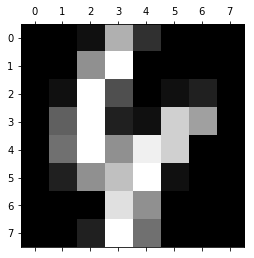

Predicted digit is : [4]
True digit is: 4


<Figure size 432x288 with 0 Axes>

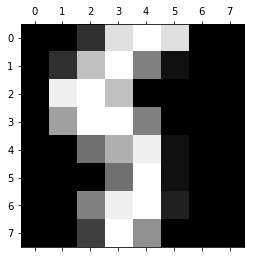

Predicted digit is : [5]
True digit is: 5


<Figure size 432x288 with 0 Axes>

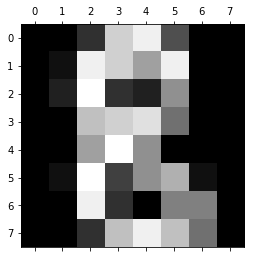

Predicted digit is : [8]
True digit is: 8


<Figure size 432x288 with 0 Axes>

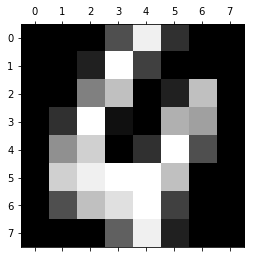

Predicted digit is : [4]
True digit is: 4


<Figure size 432x288 with 0 Axes>

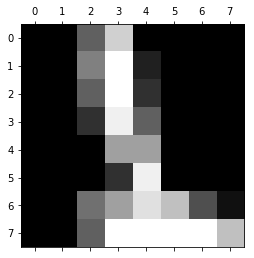

Predicted digit is : [1]
True digit is: 1


<Figure size 432x288 with 0 Axes>

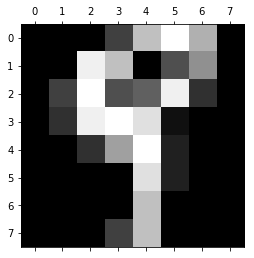

Predicted digit is : [4]
True digit is: 9


<Figure size 432x288 with 0 Axes>

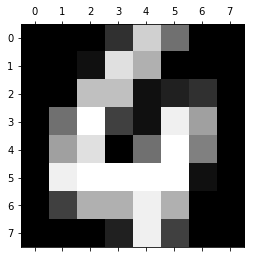

Predicted digit is : [4]
True digit is: 4


<Figure size 432x288 with 0 Axes>

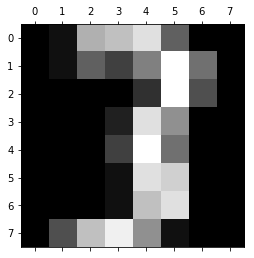

Predicted digit is : [3]
True digit is: 3


<Figure size 432x288 with 0 Axes>

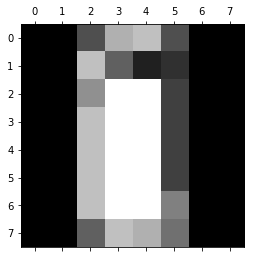

Predicted digit is : [1]
True digit is: 1


<Figure size 432x288 with 0 Axes>

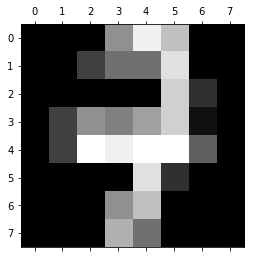

Predicted digit is : [4]
True digit is: 7


<Figure size 432x288 with 0 Axes>

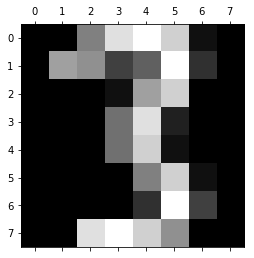

Predicted digit is : [3]
True digit is: 3


<Figure size 432x288 with 0 Axes>

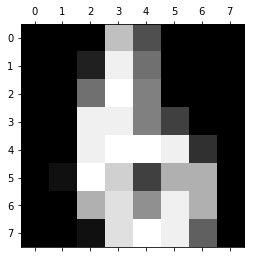

Predicted digit is : [6]
True digit is: 6


<Figure size 432x288 with 0 Axes>

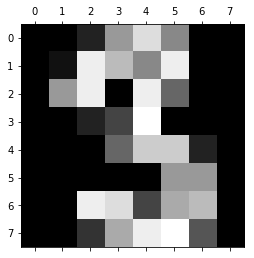

Predicted digit is : [3]
True digit is: 3


<Figure size 432x288 with 0 Axes>

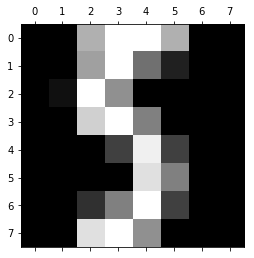

Predicted digit is : [5]
True digit is: 5


<Figure size 432x288 with 0 Axes>

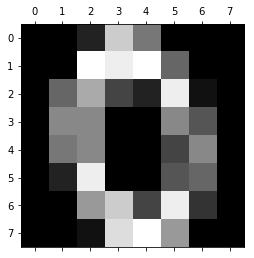

Predicted digit is : [0]
True digit is: 0


In [119]:
for j in range(15):
    i=random.randint(0,n_samples)
    pl.gray()
    pl.matshow(digits.images[i])
    pl.show()
    print('Predicted digit is : '+str(classifier.predict(x[i].reshape(1,-1))))
    print('True digit is: '+ str(y[i]))